In [1]:
from dataset import BirdData
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = BirdData()

In [3]:
data.labels.head(10)

,filename,species,num_species,studysite,audio_available
0,1.wav,"[Carduelis carduelis, Columba palumbus, Corvus...",8.0,Reik,1.0
1,2.wav,"[Chloris chloris, Columba palumbus, Cyanistes ...",6.0,Reik,1.0
2,3.wav,"[Chloris chloris, Columba palumbus, Dryocopus ...",7.0,Wies,1.0
3,4.wav,"[Columba palumbus, Dendrocopos major, Erithacu...",12.0,Reik,1.0
4,5.wav,"[Aegithalos caudatus, Carduelis carduelis, Cya...",7.0,Wies,1.0
5,6.wav,"[Columba palumbus, Corvus corone/cornix, Fring...",8.0,Wies,1.0
6,7.wav,"[Corvus corone/cornix, Fringilla coelebs, Lusc...",4.0,Wies,1.0
7,8.wav,"[Aegithalos caudatus, Columba palumbus, Cyanis...",8.0,Wies,1.0
8,9.wav,"[Carduelis carduelis, Chloris chloris, Fringil...",5.0,Reik,1.0
9,10.wav,"[Columba palumbus, Corvus corone/cornix, Fring...",7.0,Wies,1.0


In [4]:
num_samples = data.dataset["filename.new"].max()
print("Total Number of Samples >>>", num_samples)

Total Number of Samples >>> 1439


In [5]:
labeled_files = data.labels["filename"]
print("Total Number of Labeled Samples >>>", len(labeled_files))

Total Number of Labeled Samples >>> 800


In [6]:
species = data.dataset["species"].unique()
print("Total Number of species >>>", len(species))

Total Number of species >>> 63


In [7]:
average_num_birds = len(data.dataset) / len(labeled_files)
print("Average number of Birds per Audio File >>> ", average_num_birds)

Average number of Birds per Audio File >>>  8.375


In [8]:
print("Max number of Birds in Audio File >>> ", data.labels["num_species"].max())
print("Min number of Birds in Audio File >>> ", data.labels["num_species"].min())

Max number of Birds in Audio File >>>  19.0
Min number of Birds in Audio File >>>  1.0


In [9]:
data.dataset["species"].value_counts()

Turdus merula              636
Fringilla coelebs          633
Parus major                616
Columba palumbus           425
Passer montanus            421
                          ... 
Corvus monedula              1
Spinus spinus                1
Phoenicurus phoenicurus      1
Acrocephalus palustris       1
Merops apiaster              1
Name: species, Length: 62, dtype: int64

In [10]:
file = 2

fs, audio_buffer_full = data._read_audio("{}.wav".format(file))
print(fs)
print(audio_buffer_full.shape)#

32000
(9600000, 2)


In [11]:
audio_length = 10 # in seconds

In [12]:
print("Sound of channel 1")
ipd.Audio(audio_buffer_full[:audio_length*fs,0], rate=fs)

Sound of channel 1


In [13]:
print("Sound of channel 2")
ipd.Audio(audio_buffer_full[:audio_length*fs,1], rate=fs)

Sound of channel 2


In [14]:
audio_buffer = audio_buffer_full[:audio_length*fs, 0] # only use channel 1 for now

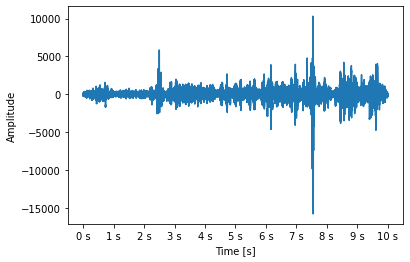

In [15]:
x_ticks = range(0, int(len(audio_buffer)/fs) + 1)
x_ticks_loc = [ x*fs for x in x_ticks]

plt.plot(audio_buffer)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

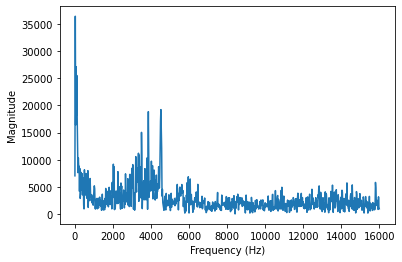

In [16]:
import numpy as np

frame_duration = 50 # milli seconds
frame_size = int(frame_duration / 1000 * fs)
start_frame = 0*fs

frame = audio_buffer[start_frame:start_frame+frame_size]
spectrum = np.fft.fft(frame)

abs_spec = np.abs(spectrum)
abs_spec = abs_spec[0:int(frame_size/2 + 1)]
freq = np.fft.rfftfreq(spectrum.shape[-1], d=1/fs)

plt.plot(freq, abs_spec)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [17]:
freqencies, times, plain_specgram = data._get_spectogram(audio_buffer, fs, frame_size)

In [18]:
print(plain_specgram.shape)

(801, 996)


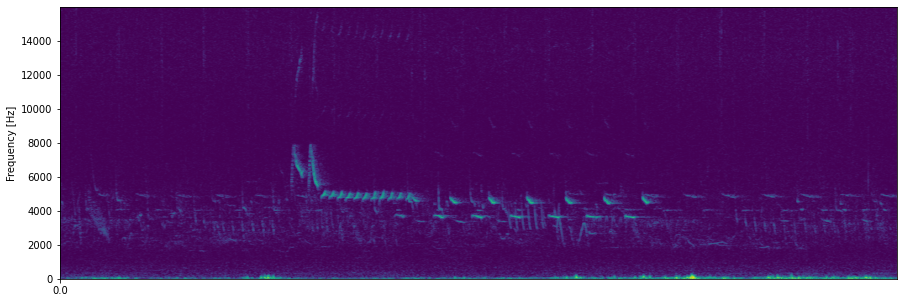

In [19]:
spec, fig = data.plot_spectrogram(audio_buffer, fs, frame_size, log_spectrogram=True)

## Difference between Channels

In [20]:
diff = audio_buffer_full[:audio_length*fs, 0] - audio_buffer_full[:audio_length*fs, 1]

In [ ]:
diff

In [26]:
sum(diff)

0

No difference at all